#    Creating really simple templates by averaging images from the training set

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from random import randint
import utils

### Download the TRAINING SET (data+labels)

In [2]:
train_data=torch.load('../../data/mnist/train_data.pt')

print(train_data.size())

torch.Size([60000, 28, 28])


In [3]:
train_label=torch.load('../../data/mnist/train_label.pt')

print(train_label.size())

torch.Size([60000])


### Make a vector called num_per_ctg that contain the number of images in each categories of the training set. This vector should have 10 entries and the first few entries are:
$$
\begin{bmatrix}
5923 & 6742 & 5958 & 6131 & \ldots 
\end{bmatrix}
$$

### meaning that training set contain 5923 zeros, 6, ones, 5958 two's, etc...

In [4]:
num_per_ctg = torch.zeros(10)

for i in range(0,10):
    idx_for_num = []
    for j in range(0,60000):
        if train_label[j].item() == i:
            idx_for_num.append(j)
    num_per_ctg[i] = len(idx_for_num)
    
print(num_per_ctg)

tensor([5923., 6742., 5958., 6131., 5842., 5421., 5918., 6265., 5851., 5949.])


### Create a 10-by-784 matrix as follow:
* The first row contains the average of the  5923 images of zero in the training set
* The second row contains the average of the  6742 images of zero in the training set
* etc...

### In other words, you are storing very simple templates in each rows of W

In [25]:
W = torch.zeros(10,784)

for i in range(0,10):
    for j in range(0,60000):
        if train_label[j] == i:
            W[i] += train_data[j].view(784)
    W[i] = W[i]/num_per_ctg[i]

print(W)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


### Now we are going to visualize the templates (you have nothing to do here):

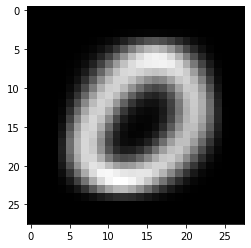

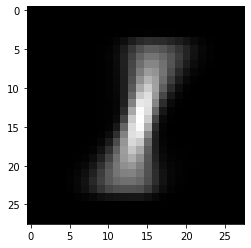

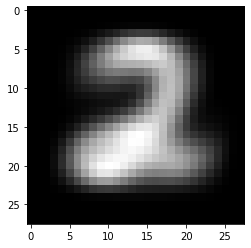

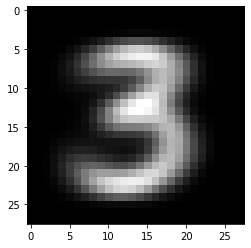

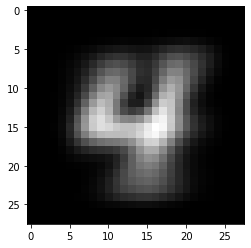

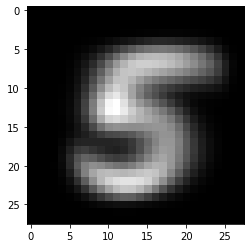

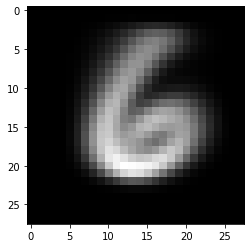

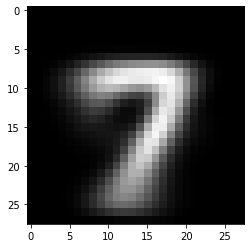

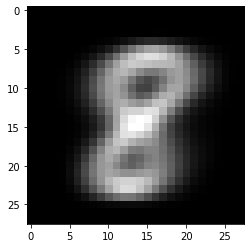

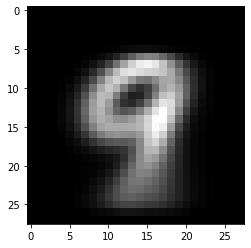

In [31]:
for label in range(0,10):
    utils.show(W[label].view(28,28))

### Create a one layer neural net WITHOUT BIAS

In [32]:
class one_layer_net(nn.Module):

    def __init__(self, input_size, output_size):
        super().__init__()
        
        self.linear_layer = nn.Linear(input_size, output_size, bias=False)
        
    def forward(self, x):
        x = self.linear_layer(x)
        p = F.softmax(x, dim=1)
        return p

### Instanciate it

In [33]:
net = one_layer_net(784,10)
print(net)

one_layer_net(
  (linear_layer): Linear(in_features=784, out_features=10, bias=False)
)


### The weights are random small numbers. Overwrite these weights with the matrix W containing the simple templates. Remember that mod.weight is a parameter object, not a tensor. To access the tensor inside the parameter you need to do mod.weight.data.

In [34]:
for i in range(0,10):
    net.linear_layer.weight.data[i] = W[i]

### Download the test set (both data and label)

In [35]:
test_data=torch.load('../../data/mnist/test_data.pt')
print(test_data.size())

torch.Size([10000, 28, 28])


In [36]:
test_label=torch.load('../../data/mnist/test_label.pt')
print(test_label.size())

torch.Size([10000])


### Use the code from part4 to see how many images in the test set are correctly classified by this network with stupid templates. Which of the network from part 4 or part 5 does better? 

In [37]:
num_correct = 0

num_correct = 0

for i in range(10000):
    prob = net(test_data[i].view(1,784))
    i_max = torch.argmax(prob)
    if i_max.item() == test_label[i].item():
        num_correct += 1   
    
print(num_correct)    

6310


This method is not as good as the method in part 4